In [1]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import normalize, StandardScaler
# from sklearn.datasets import load_boston
from tqdm import tqdm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_classif,  f_regression

# Task 1

In [2]:
n = 200

X1 = st.norm.rvs(size=n)
X2 = st.norm.rvs(size=n)
X3 = st.norm.rvs(size=n)
X4 = st.norm.rvs(size=n)
eps = st.norm.rvs(size=n)

y = 0.9 * X1 + 0.1 * X2 + 0.3 * X1 * X2 + eps

In [3]:
X = np.stack([X1, X1**2, X2, X2**2, X3, X3**2, X4, X4**2])
names = np.array('X1, X1**2, X2, X2**2, X3, X3**2, X4, X4**2'.split(', '))
names

array(['X1', 'X1**2', 'X2', 'X2**2', 'X3', 'X3**2', 'X4', 'X4**2'],
      dtype='<U5')

In [4]:
p = 8
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

K

[[False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False],
 [False, True, False, False, False, False, False, False],
 [True, True, False, False, False, False, False, False],
 [False, False, True, False, False, False, False, False],
 [True, False, True, False, False, False, False, False],
 [False, True, True, False, False, False, False, False],
 [True, True, True, False, False, False, False, False],
 [False, False, False, True, False, False, False, False],
 [True, False, False, True, False, False, False, False],
 [False, True, False, True, False, False, False, False],
 [True, True, False, True, False, False, False, False],
 [False, False, True, True, False, False, False, False],
 [True, False, True, True, False, False, False, False],
 [False, True, True, True, False, False, False, False],
 [True, True, True, True, False, False, False, False],
 [False, False, False, False, True, False, False, False],
 [True, False, False, False, T

['X1']


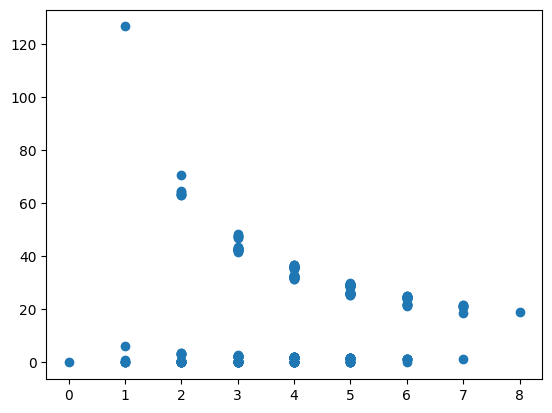

In [5]:
subset_size = []
err = []
for el in K:
    X_ = X[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    if sum(el) != 0:
        subset_size.append(sum(el))
        err.append(reg.fvalue)
    else:
        subset_size.append(0)
        err.append(0)

print(names[K[np.argmax(err)]])
plt.scatter(subset_size, err)

<BarContainer object of 9 artists>

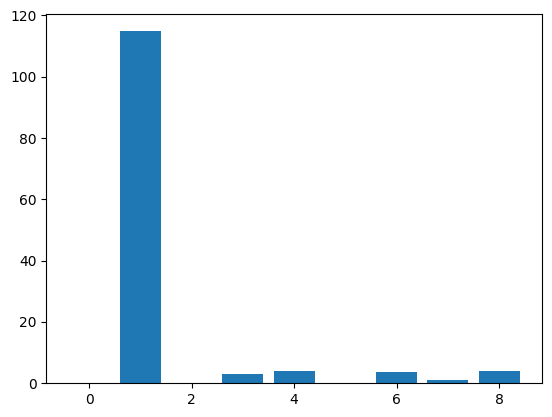

In [42]:
selector = SelectKBest(score_func= f_regression, k='all')
X_ = sm.add_constant(X.T)
X_reduced = selector.fit(X_, y)
plt.bar([i for i in range(len(selector.scores_))], selector.scores_)


['X1' 'X1**2' 'X2**2']


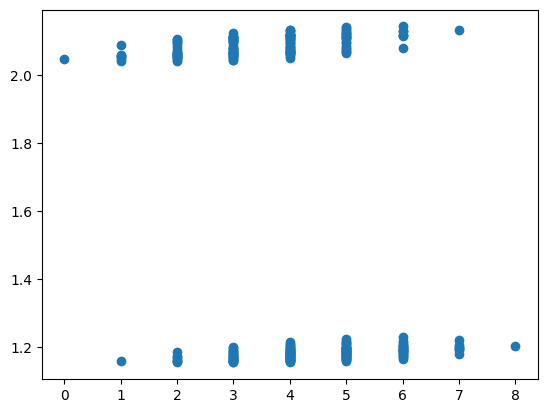

In [5]:
subset_size = []
err = []
for el in K:
    X_ = X[el].T
    X_ = sm.add_constant(X_)

    kf = KFold(n_splits=5)
    kf_err = []
    for train_index, test_index in kf.split(X_):
        reg = sm.OLS(y[train_index], X_[train_index]).fit()
        kf_err.append(np.mean((reg.predict(X_[test_index]) - y[test_index])**2))
    
    subset_size.append(sum(el))
    err.append(np.mean(kf_err))

print(names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['X1' 'X1**2' 'X2']


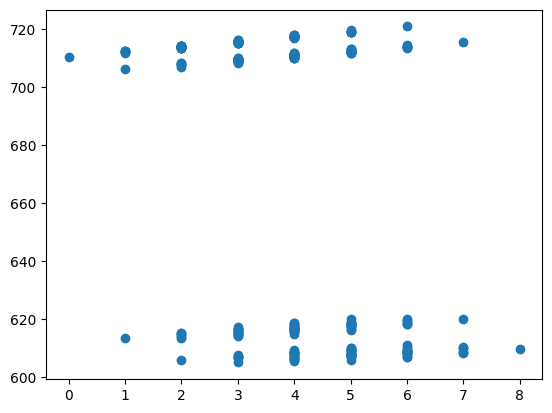

In [8]:
subset_size = []
err = []
for el in K:
    X_ = X[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.aic)

print(names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['X1' 'X2']


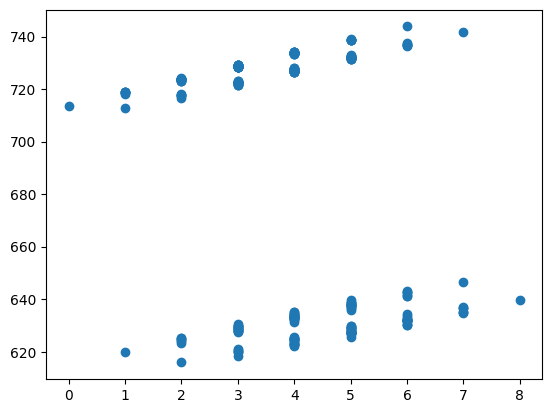

In [9]:
subset_size = []
err = []
for el in K:
    X_ = X[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.bic)

print(names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

# Task 2


In [6]:
df = pd.read_csv('./datasets/DIM-cofreewy.txt', sep='\t')
df.head()

,Hour,CO,Traffic,Wind
0,1,2.4,50,-0.2
1,2,1.7,26,0.0
2,3,1.4,16,0.0
3,4,1.2,10,0.0
4,5,1.2,12,0.1


In [7]:
df['Wind^2'] = df.Wind**2
df['Periodic hour'] = np.sin(2 * np.pi / 24 * df.Hour)

In [8]:
df.columns

Index(['Hour', 'CO', 'Traffic', 'Wind', 'Wind^2', 'Periodic hour'], dtype='object')

In [9]:
feature_names_first = np.array(['Hour', 'Traffic', 'Wind'])
feature_names_second = np.array(['Hour', 'Traffic', 'Wind', 'Wind^2', 'Periodic hour'])

target_name = 'CO'

['Traffic' 'Wind']


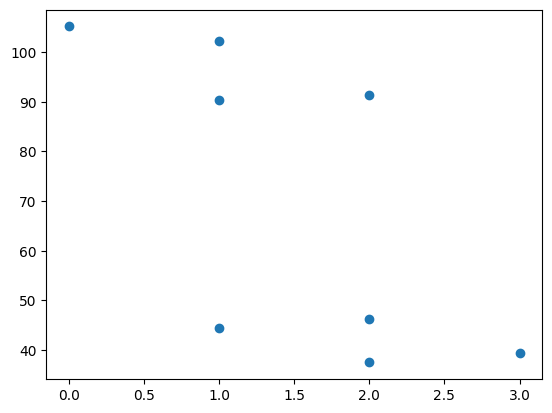

In [55]:
X = df[feature_names_first].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.aic)

print(feature_names_first[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['Traffic' 'Wind']


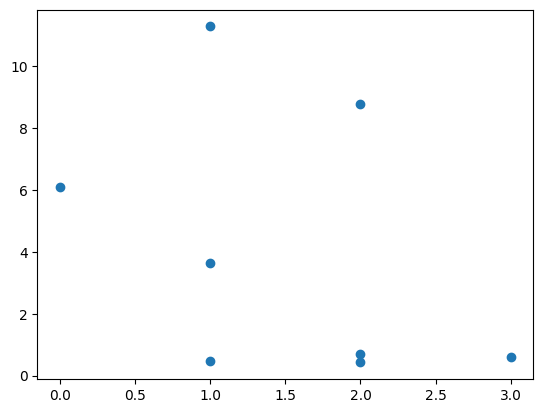

In [56]:
X = df[feature_names_first].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    kf = KFold(n_splits=5)
    kf_err = []
    for train_index, test_index in kf.split(X_):
        reg = sm.OLS(y[train_index], X_[train_index]).fit()
        kf_err.append(np.mean((reg.predict(X_[test_index]) - y[test_index])**2))
    
    subset_size.append(sum(el))
    err.append(np.mean(kf_err))

print(feature_names_first[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['Traffic' 'Wind' 'Wind^2' 'Periodic hour']


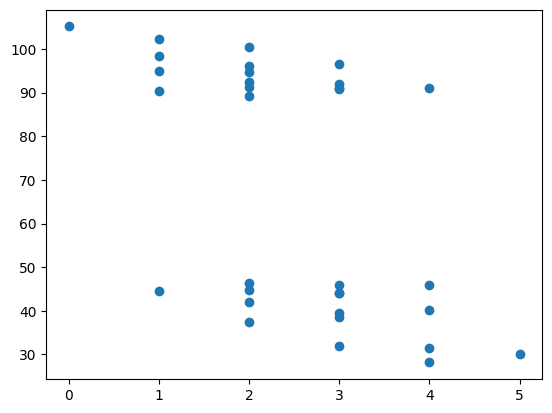

In [12]:
X = df[feature_names_second].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.aic)

print(feature_names_second[K[np.argmin(err)]])
plt.scatter(subset_size, err)

In [28]:
level = 2
feature_names_second[np.array(K)[(np.array(subset_size)==level) & (np.array(err) == min(np.array(err)[np.array(subset_size)==level]))][0]]

array(['Traffic', 'Wind'], dtype='<U13')

array([[False,  True,  True,  True, False]])

['Traffic' 'Wind' 'Wind^2' 'Periodic hour']


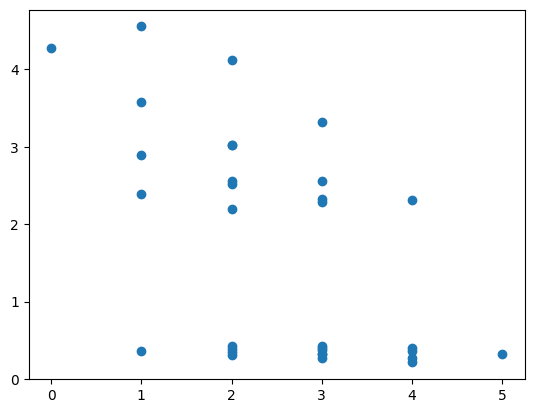

In [31]:
X = df[feature_names_second].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    kf = KFold(n_splits=20)
    kf_err = []
    for train_index, test_index in kf.split(X_):
        reg = sm.OLS(y[train_index], X_[train_index]).fit()
        kf_err.append(np.mean((reg.predict(X_[test_index]) - y[test_index])**2))
    
    subset_size.append(sum(el))
    err.append(np.mean(kf_err))

print(feature_names_second[K[np.argmin(err)]])
plt.scatter(subset_size, err)

# Task 3

In [32]:
df = pd.read_csv('./datasets/DIM-physical.txt', sep='\t')
df.head()

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [33]:
feature_names = np.array(['Fore', 'Bicep', 'Chest', 'Neck', 'Shoulder', 'Waist', 'Height',
       'Calf', 'Thigh', 'Head'])
target_name = 'Mass'

['Fore' 'Waist' 'Height' 'Calf' 'Thigh' 'Head']


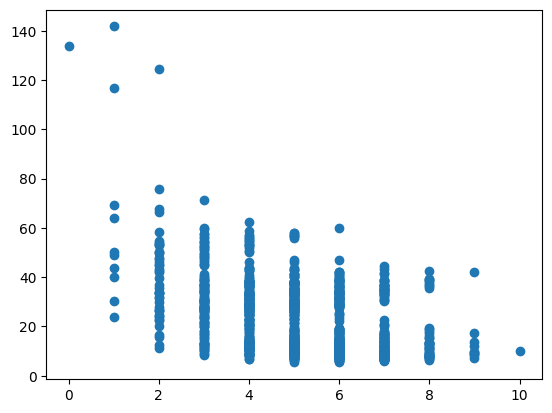

In [34]:
X = df[feature_names].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    kf = KFold(n_splits=10)
    kf_err = []
    for train_index, test_index in kf.split(X_):
        reg = sm.OLS(y[train_index], X_[train_index]).fit()
        kf_err.append(np.mean((reg.predict(X_[test_index]) - y[test_index])**2))
    
    subset_size.append(sum(el))
    err.append(np.mean(kf_err))

print(feature_names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['Fore' 'Waist' 'Height' 'Calf' 'Thigh' 'Head']


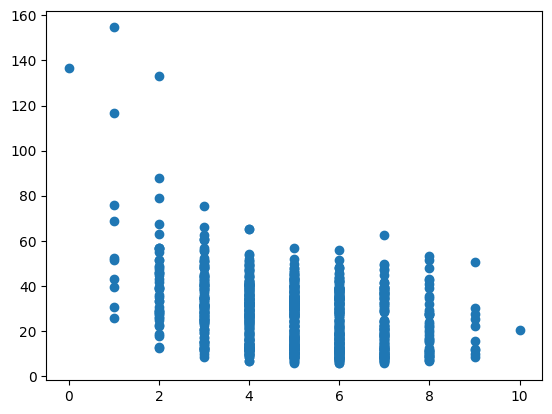

In [35]:
s = StandardScaler()

X = df[feature_names].to_numpy()
y = df[target_name]

s.fit(X)
X = s.transform(X)

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    kf = KFold(n_splits=5)
    kf_err = []
    for train_index, test_index in kf.split(X_):
        reg = sm.OLS(y[train_index], X_[train_index]).fit()
        kf_err.append(np.mean((reg.predict(X_[test_index]) - y[test_index])**2))
    
    subset_size.append(sum(el))
    err.append(np.mean(kf_err))

print(feature_names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['Fore' 'Waist' 'Height' 'Calf' 'Thigh' 'Head']


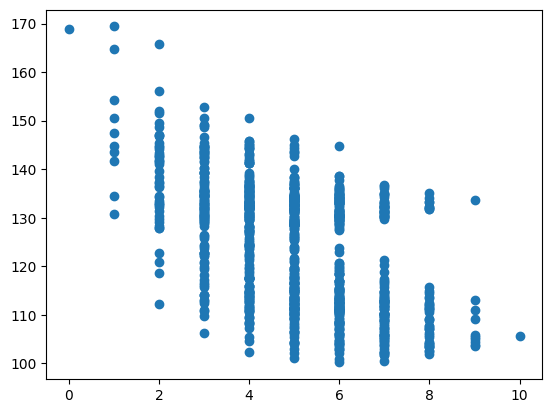

In [63]:
X = df[feature_names].to_numpy()
y = df[target_name]

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.aic)

print(feature_names[K[np.argmin(err)]])
plt.scatter(subset_size, err)

['Fore' 'Waist' 'Height' 'Calf' 'Thigh' 'Head']


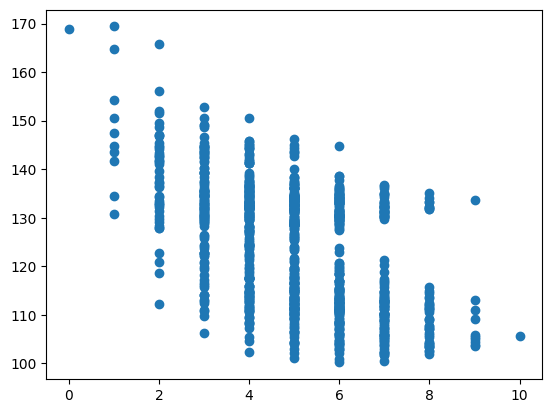

In [64]:
s = StandardScaler()

X = df[feature_names].to_numpy()
y = df[target_name]

s.fit(X)
X = s.transform(X)

p = X.shape[1]
K = []

for i in range(2**p):
    tmp = []
    for j in range(p):
        tmp.append(i & (1 << j) != 0)
        # tmp.append(i & (1 << j) != 0)
    K.append(tmp)

subset_size = []
err = []
for el in K:
    X_ = X.T[el].T
    X_ = sm.add_constant(X_)

    reg = sm.OLS(y, X_).fit()
    
    subset_size.append(sum(el))
    err.append(reg.aic)

print(feature_names[K[np.argmin(err)]])
plt.scatter(subset_size, err)